In [86]:
# Dataset for clustering -> online shoppers intention
# Dataset for text-mining -> bbc
import pandas as pd
rs = 42

In [5]:
!ls

 bbc.csv	      online_shoppers_intention.csv   web_log_data.csv
 IFN645.ipynb	      text-files-to-mine
'online retail.csv'   text-files-to-mine.zip


In [56]:
df = pd.read_csv('online_shoppers_intention.csv')

In [8]:
len(df)

12330

In [12]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [13]:
import numpy as np

In [14]:

# We should have 10 numerical and 9 categorial features

## Therefore, the first 10 is numerical, others are categorial
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

# Clustering

Attribute Information: The following six attributes, "Administrative", "Administrative
Duration", "Informational", "Informational Duration", "Product Related" and "Product
Related Duration", represent the number of different types of pages visited by the visitor
in a session and the total time spent in each of these page categories.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

Task 1. Data Preparation for Clustering.
    1. Can you identify data quality issues in this dataset such as unusual data types,
    missing values, etc?
    2. What variables did you include in the analysis and what were their roles and
    measurement level set? Justify your choice. Answer this question for each of the
    tasks 2 and 3.

In [74]:
def seperateDfToNumAndCat(df):
    Cat = []
    Num = []
    for colName in df.columns:
        if (df[colName].dtype == np.float):
            Num.append(colName)
        else:
            Cat.append(colName)
            
    return {
        'Cat':Cat,
        'Num':Num
    }
seperateDfToNumAndCat(df)

{'Cat': ['Month',
  'OperatingSystems',
  'Browser',
  'Region',
  'TrafficType',
  'VisitorType',
  'Weekend',
  'Revenue'],
 'Num': ['Administrative',
  'Administrative_Duration',
  'Informational',
  'Informational_Duration',
  'ProductRelated',
  'ProductRelated_Duration',
  'BounceRates',
  'ExitRates',
  'PageValues',
  'SpecialDay']}

In [30]:
df['Revenue'].dtype == np.float

False

In [24]:
# Null values are found 

def printNullValueCol(df):
    return [colName for colName in df.columns if(df[colName].isnull().sum() > 0)]
            
print('Columns contain NULL: \n',printNullValueCol(df))    

Columns contain NULL: 
 ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates']


In [20]:
# replaced_vals = ['?', '#VALUE!']
def printColumnInfo(df):
    
    '''
    Display the information of this Dataframe
    '''
    
    for colName in df.columns:
        print("======================= " + str(colName) + " =======================")
        print("----------------------- FIRST FIVE -----------------------")
        print(df[colName][:5])
        print("----------------------- DESCIRBE -----------------------")
        print(df[colName].describe())
        print("----------------------- COUNTS -----------------------")
        commonList = list(df[colName].value_counts().keys())
        if len(commonList) > 100:
            print("Five Most Common: ", commonList[:5])
        else:
            print("Count List: \n", df[colName].value_counts())
        print("Num of NULL: ", df[colName].isnull().sum())
#         for rep in replaced_vals:
#             print("Number of "+str(rep)+" : " + str(len(df[df[colName] == rep])))
printColumnInfo(df)

======================= Administrative =======================
----------------------- FIRST FIVE -----------------------
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Administrative, dtype: float64
----------------------- DESCIRBE -----------------------
count    12316.000000
mean         2.317798
std          3.322754
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64
----------------------- COUNTS -----------------------
Count List: 
 0.0     5754
1.0     1354
2.0     1114
3.0      915
4.0      765
5.0      575
6.0      432
7.0      338
8.0      287
9.0      225
10.0     153
11.0     105
12.0      86
13.0      56
14.0      44
15.0      38
16.0      24
17.0      16
18.0      12
19.0       6
24.0       4
22.0       4
23.0       3
20.0       2
21.0       2
26.0       1
27.0       1
Name: Administrative, dtype: int64
Num of NULL:  14
======================= Administrative_Duration ======

In [73]:
seperateDfToNumAndCat(df)

{'Cat': ['Administrative',
  'Administrative_Duration',
  'Informational',
  'Informational_Duration',
  'ProductRelated',
  'ProductRelated_Duration',
  'BounceRates',
  'ExitRates',
  'PageValues',
  'SpecialDay'],
 'Num': ['Month',
  'OperatingSystems',
  'Browser',
  'Region',
  'TrafficType',
  'VisitorType',
  'Weekend',
  'Revenue']}

In [75]:
# first strategy -> replacing the null value by the mean


## As we known from above the columns that contain null are numerical columns. therefore, 
## the NULL value should be replace by the mean


from copy import deepcopy

def preprocessTheNullValue(df_input, colTypes):
    df = deepcopy(df_input)
    for colName in df.columns:
        ## Dealing with the Numerical first
        if (colName in colTypes['Num']):
            df[colName] = df[colName].astype('float')
            if (df[colName].isnull().sum() > 0):
                df[colName] = df[colName].fillna(df[colName].mean())
        
        ## Dealing with the Categorial
        
        elif (colName in colTypes['Cat']):
            df[colName] = df[colName].astype('category')
            if (df[colName].isnull().sum() > 0):
                df[colName] = df[colName].fillna(df[colName].describe()['top'])

    return df

preprocessed_df = preprocessTheNullValue(df, seperateDfToNumAndCat(df))

#### After the preprocessing 

In [58]:
df.isnull().sum().sum() # If we don't need to use this df, we can delete it latter

112

In [59]:
preprocessed_df.isnull().sum().sum()

0

In [ ]:
def plotAllCols (df):
    for colName in df.columns:
        plt.figure(figsize=(20,10))
        if colName in categorial_cols:
            ### if it's categorial column, plot hist diagram 
            sns.countplot(x=colName, data = df, hue="IsBadBuy")
        elif colName in interval_cols:
            ### if it's interval column, plot box diagram
            sns.boxplot(x="IsBadBuy", y=colName, data = df )

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
def plotingAllCols(df, colTypes):
    
    for colName in df.columns:
        print('===================',colName,'===================')
        if (colName in colTypes['Num']):
            sns.distplot(df[colName])
        elif (colName in colTypes['Cat']):
            sns.countplot(df[colName])
        else:
            raise ValueError
        plt.show()

=================== Administrative ===================


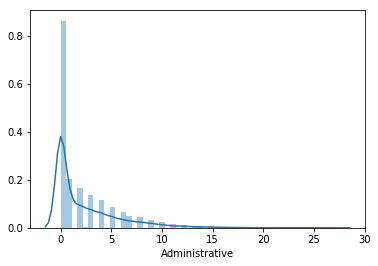

=================== Administrative_Duration ===================


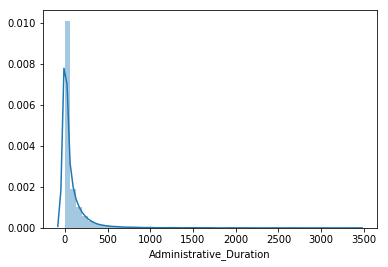

=================== Informational ===================


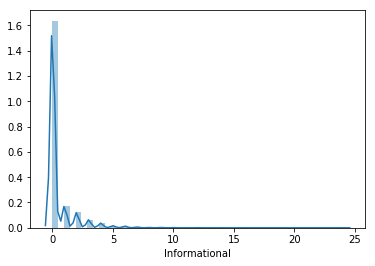

=================== Informational_Duration ===================


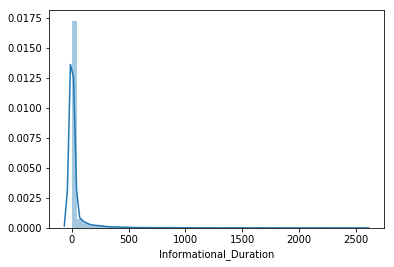

=================== ProductRelated ===================


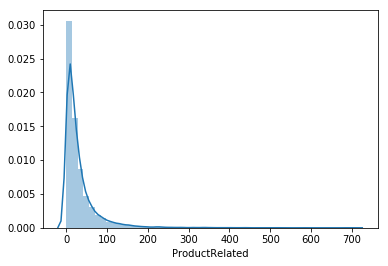

=================== ProductRelated_Duration ===================


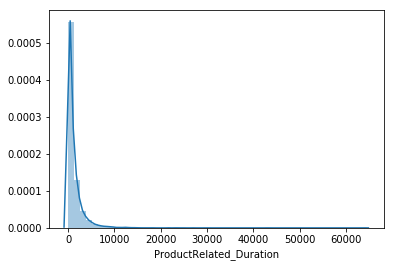

=================== BounceRates ===================


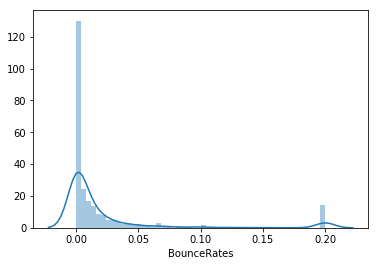

=================== ExitRates ===================


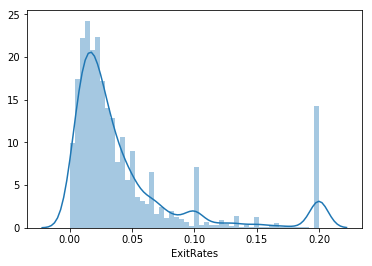

=================== PageValues ===================


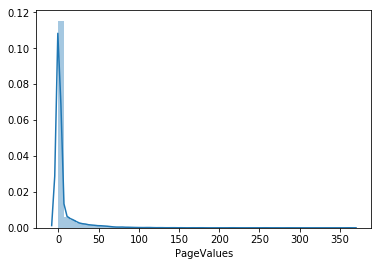

=================== SpecialDay ===================


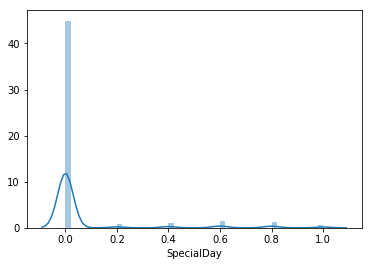

=================== Month ===================


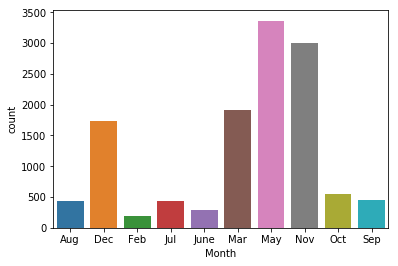

=================== OperatingSystems ===================


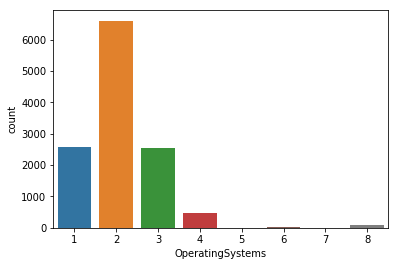

=================== Browser ===================


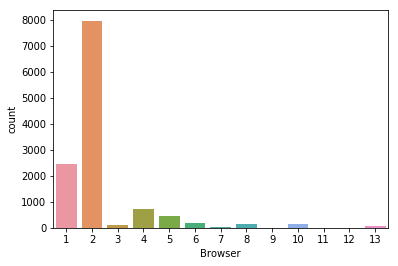

=================== Region ===================


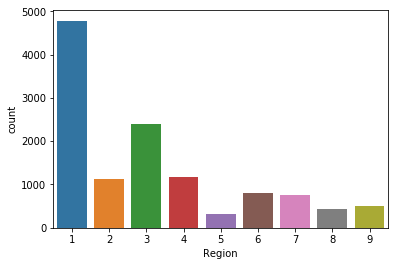

=================== TrafficType ===================


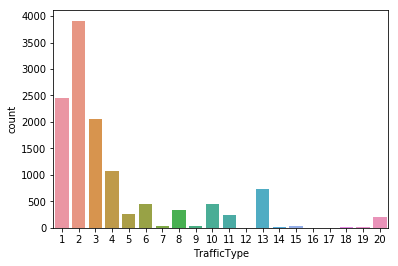

=================== VisitorType ===================


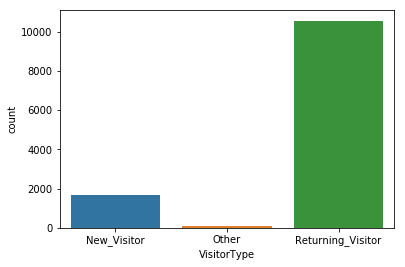

=================== Weekend ===================


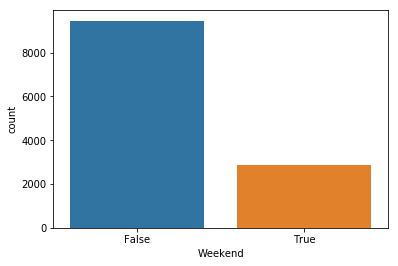

=================== Revenue ===================


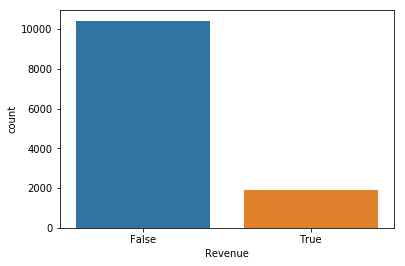

In [81]:
plotingAllCols(preprocessed_df, seperateDfToNumAndCat(df))

In [ ]:
### Use the cetroid distance for measuring the cluster performance

In [82]:
# from sklearn.preprocessing import StandardScaler

# # take 3 variables and drop the rest
# df2 = df[['MedHHInc', 'MeanHHSz', 'RegDens']]

# # convert df2 to matrix
# X = df2.as_matrix()

# # scaling
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [ ]:
### How can we dealing with the negative value in these 3 cols? since the duration shouldn't be -1

In [114]:
# What variables did you include in the analysis and what were their roles and
# measurement level set? Justify your choice. Answer this question for each of the
# tasks 2 and 3.

'''
Since the first task want to cluster the customers based on the time they spend on the website. So we only contain
the features that related to time spending on different types of page.

'''
taskOneIncludingCols= ['Administrative',
  'Administrative_Duration',
  'Informational',
  'Informational_Duration',
  'ProductRelated',
  'ProductRelated_Duration',]

taskOneDf = preprocessed_df[taskOneIncludingCols]

In [85]:
from sklearn.cluster import KMeans

In [88]:
model = KMeans(n_clusters=3, random_state=rs)
model.fit(taskOneDf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [89]:
model.cluster_centers_

array([[1.82266941e+00, 6.21353570e+01, 3.27754799e-01, 2.00062723e+01,
        1.86498516e+01, 5.78179107e+02],
       [7.43961353e+00, 2.95364891e+02, 2.74879227e+00, 2.66723094e+02,
        2.36106280e+02, 1.08861744e+04],
       [4.32506329e+00, 1.54877478e+02, 1.17417722e+00, 8.46726198e+01,
        7.77296203e+01, 3.35510746e+03]])

In [91]:
#Task2.1 for determining the number of the clusters
#
from sklearn.metrics import silhouette_score

In [104]:
def ElbowEffectAndSilhouetteScore(data, kRunRange):
    clusters = []
    inertial_vals = []
    silhouette_scores = []
    
    for i in kRunRange:
        model = KMeans(n_clusters=i, random_state=rs, n_jobs=10)
        model.fit(data)
        clusters.append(model)
        inertial_vals.append(model.inertia_)
        silhouette_scores.append(silhouette_score(data, model.predict(data)))
    
    
    fig = plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(kRunRange, inertial_vals, marker='o', label='Inertial_vals')
    plt.xlabel('Inertial_vals', fontsize=8)
    plt.ylabel('Number of clusters', fontsize=8)    
    
    plt.subplot(212)
    plt.plot(kRunRange, silhouette_scores, marker='o', label="silhouette_scores")
    plt.xlabel('Silhouette_scores', fontsize=8)
    plt.ylabel('Number of clusters', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    return clusters

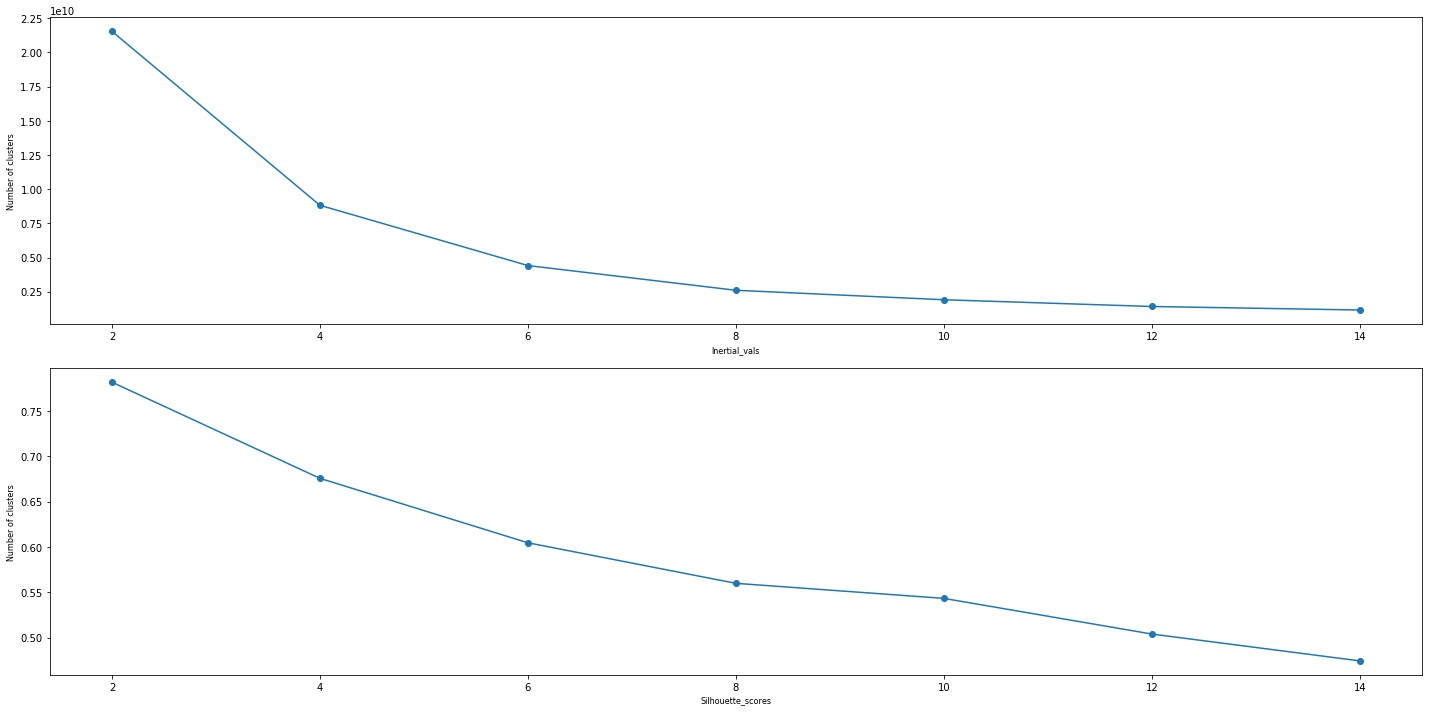

In [105]:
clusters = ElbowEffectAndSilhouetteScore(taskOneDf, range(2,15,2))

In [ ]:
# Determine it between k=4 and k=6, then the k=4 has larger silhouetteScore. 
# Therefore, k=4 contain the clusters that  matcht its own cluster better than k=6

b. For the model with the optimal number of clusters, list the variables that
were found important in determining the clusters?  

Q: What's the vraibles mean? the features or the inertial_vals and silhouette_scores?

c. Explain the cluster results. Q: show I use the plot to explain?

Best Model Clusters k = 4


/home/chihcheng/python3env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


LinAlgError: singular matrix

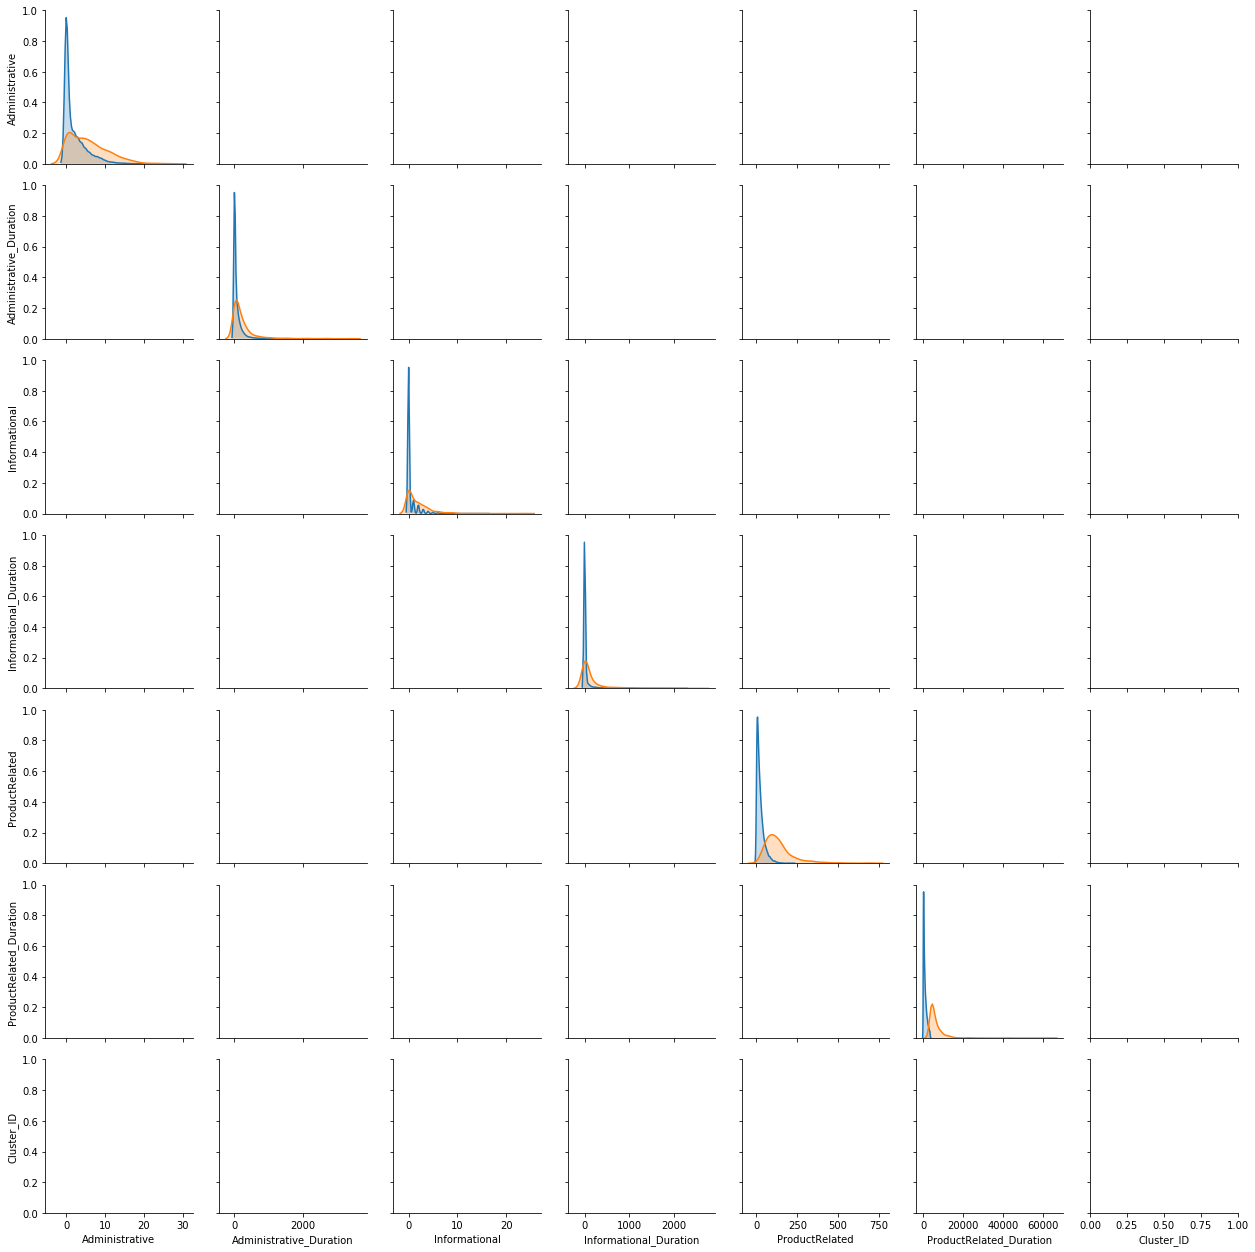

In [140]:
print("Best Model Clusters k =",clusters[1].n_clusters)

taskOneDf['Cluster_ID'] = clusters[0].predict(taskOneDf.drop(['Cluster_ID'], axis= 1))
sns.pairplot(taskOneDf, hue='Cluster_ID', plot_kws={'alpha:0.5'} )

2. What is the effect of using the standardization method on the model above? Does
the variable normalization process enable a better clustering solution

In [149]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

taskOneDfStandardized = scaler.fit_transform(taskOneDf)

/home/chihcheng/python3env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/chihcheng/python3env/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


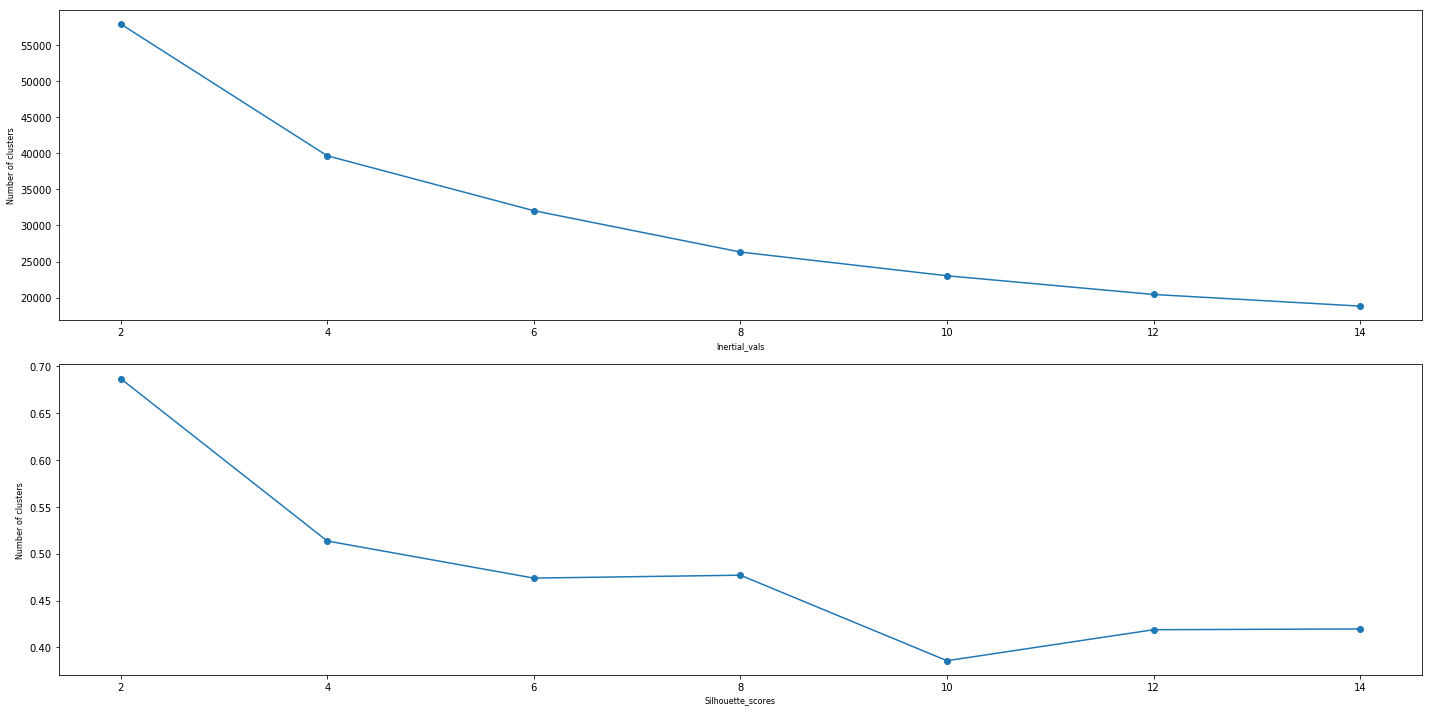

In [151]:
clustersStandardised = ElbowEffectAndSilhouetteScore(taskOneDfStandardized, range(2,15,2))

In [ ]:
## Q: How can I know which one is better?

3. Interpret the cluster analysis outcome. In other words, characterize the nature of
each cluster by giving it a descriptive label and a brief description. 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.000000,0.0,0.00,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.000000,0.0,0.00,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.000000,0.0,-1.00,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.000000,0.0,0.00,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.000000,0.0,0.00,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.000000,0.0,0.00,19.0,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-1.000000,0.0,-1.00,1.0,-1.000000,0.200000,0.200000,0.000000,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.000000,0.0,-1.00,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.0,0.000000,0.0,0.00,2.0,37.000000,0.000000,0.100000,0.000000,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,0.000000,0.0,0.00,3.0,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


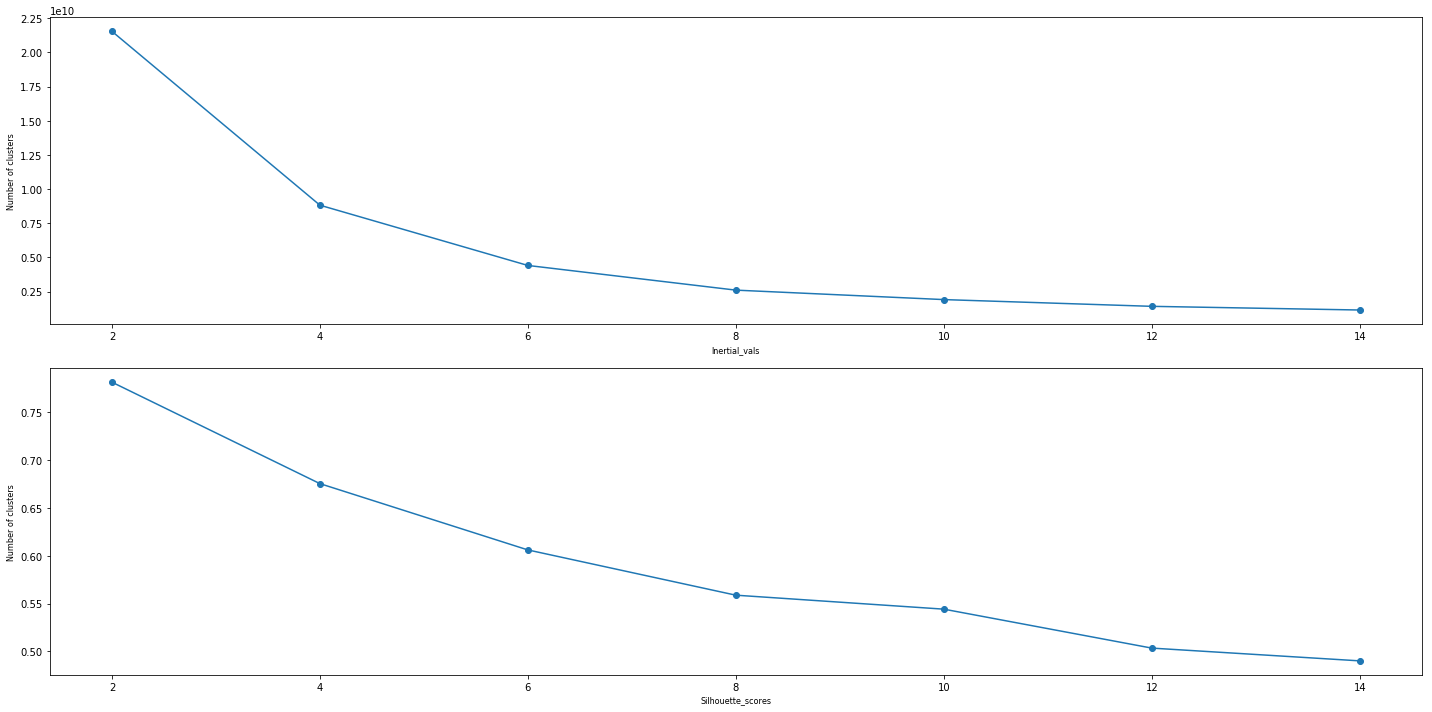

In [156]:
clustersAllInfo = ElbowEffectAndSilhouetteScore(pd.get_dummies(preprocessed_df),  range(2,15,2))

In [157]:
scaler = StandardScaler()

preprocessed_df_standardised = scaler.fit_transform(pd.get_dummies(preprocessed_df))

/home/chihcheng/python3env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/chihcheng/python3env/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


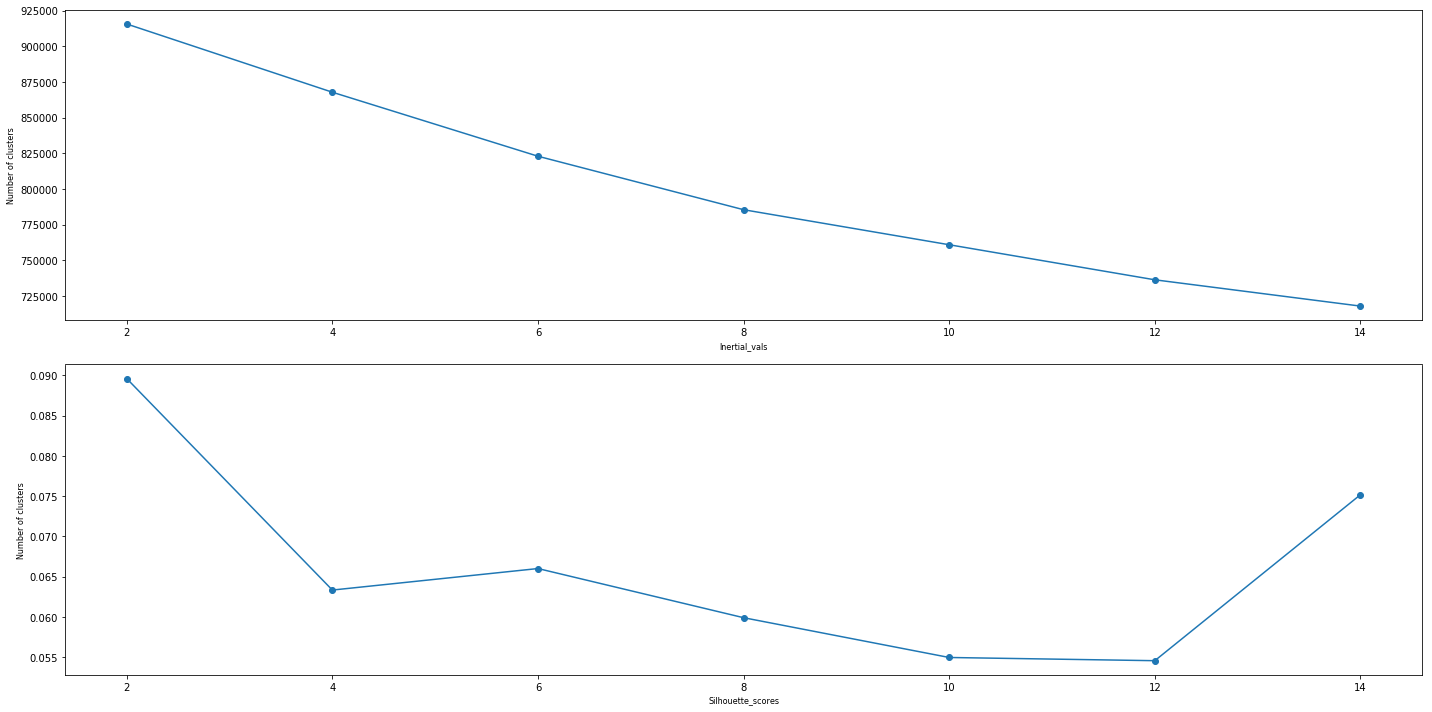

In [158]:
clustersAllInfo_standardised = ElbowEffectAndSilhouetteScore(preprocessed_df_standardised,  range(2,15,2))

Decision Making: Finally, could you detail - how the outcome of clustering analysis can
be used by decision makers?

In [161]:
!ls

 bbc.csv	      online_shoppers_intention.csv   web_log_data.csv
 IFN645.ipynb	      text-files-to-mine
'online retail.csv'   text-files-to-mine.zip


In [159]:
##### Text Mining

In [160]:
import glob

In [166]:
path = 'text-files-to-mine/*.txt'
files = glob.glob(path)

In [175]:
allText = []
for name in files:
    with open(name) as f:
        allText.append(f.read().split("\n\n"))

In [171]:
files[0]

'text-files-to-mine/072.txt'

In [176]:
allText[0]

['Henman & Murray claim LTA awards',
 'Tim Henman was named player of the year for 2004 by the Lawn Tennis Association at Wimbledon on Monday.',
 "The Briton was recognised for the best year of his career, which saw him reach the semis at the French and US Opens. Scotland's Andrew Murray was named young player of the year after winning the US Open juniors, as well as a Futures event in Italy. And world number one Peter Norfolk won disabled player of the year after claiming his third US Open crown.",
 'Great Britain\'s under 14 boys won the team of the year prize for their victory at the World Junior Tennis event in August. Henman will start his 2005 campaign at the Kooyong event on 12 January in a field that includes Roger Federer, Andy Roddick and Andre Agassi. And the Briton is optimistic of surpassing his best effort of a fourth-round place at the Australian Open, which begins the following week. "I\'ve often felt that the conditions suit my game in Melbourne so I\'d love to be able

In [187]:
import string

from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag

In [184]:
lemmatizer = WordNetLemmatizer()
punct = set(string.punctuation)

In [188]:
sw.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [189]:
def lemmatize(token, tag):
    tag = {
        'N': wn.NOUN,
        'V': wn.VERB,
        'R': wn.ADV,
        'J': wn.ADJ
    }.get(tag[0], wn.NOUN)

    return lemmatizer.lemmatize(token, tag)